**Name:** Miraj Rahman Sanjid

**CS 505 Data Mining**
**: Logistic Regression**

**Objective:**

To implement and evaluate a logistic regression model for a binary classification problem. It will help us gain experience in data preprocessing, model training, evaluation, and interpretation.

**Dataset**

Titanic Survival Prediction Dataset

**Source Link**

https://www.kaggle.com/datasets/yasserh/titanic-dataset/data

**-------------------------------------------------------------------------------------------------------------------------------------------------------**

In [145]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

In [3]:
#Import dataset
dataset = pd.read_csv("E:/Computer Science SEMO/6th semester/CS 505/Classification Assignments/Titanic Survival/Titanic Survival df/Titanic-Dataset.csv")

In [82]:
#Explore the dataset
print(dataset.head(5))
print(dataset.info())
print(dataset.describe())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [84]:
dataset.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [86]:
#Dropping Unnecessary columns
cols_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin' ]
df = dataset.drop(columns = cols_to_drop)

In [88]:
#Checking if there are missing values
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [90]:
#Filling Missing Values
df['Age'] = df['Age'].fillna(df['Age'].median())

df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0]).astype(str)

In [92]:
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [94]:
#Encoding Categorical variables
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

In [96]:
#Separate Features and Target Variables
x = df.drop(columns=['Survived'])
y = df['Survived']

In [98]:
import numpy as np

# Check for NaNs
print("Missing values:\n", x.isnull().sum())

# Check for infinite values
print("Infinite values present:\n", np.isinf(x).sum())


Missing values:
 Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
Infinite values present:
 Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [100]:
#Scale 
scaler = StandardScaler()
x[['Age', 'Fare']] = scaler.fit_transform(x[['Age', 'Fare']])

In [102]:
#Split the dataset into test and train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [106]:
# Display shapes of training and testing sets
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((712, 7), (179, 7), (712,), (179,))

In [122]:
# Train Logistic Regression Model
model = LogisticRegression(random_state=42)
model.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [124]:
#Make predictions
y_pred = model.predict(x_test)

In [126]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [143]:

# Define parameter grid
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}

# Perform grid search
grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Train model with best parameters
best_model = grid_search.best_estimator_


Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


In [128]:
# Print results
print(f"\n🔹 Logistic Regression Model Accuracy: {accuracy:.4f}\n")
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


🔹 Logistic Regression Model Accuracy: 0.8045

Confusion Matrix:
 [[98 12]
 [23 46]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       110
           1       0.79      0.67      0.72        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



Feature Importance:
     Feature  Coefficient
5      Fare     0.436098
4     Parch    -0.003889
6  Embarked    -0.014715
3     SibSp    -0.183546
2       Age    -0.286806
0    Pclass    -0.348443
1       Sex    -1.636869


C:\Users\hp\AppData\Local\Temp\ipykernel_7172\251377695.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance['Coefficient'], y=feature_importance['Feature'], palette="coolwarm")


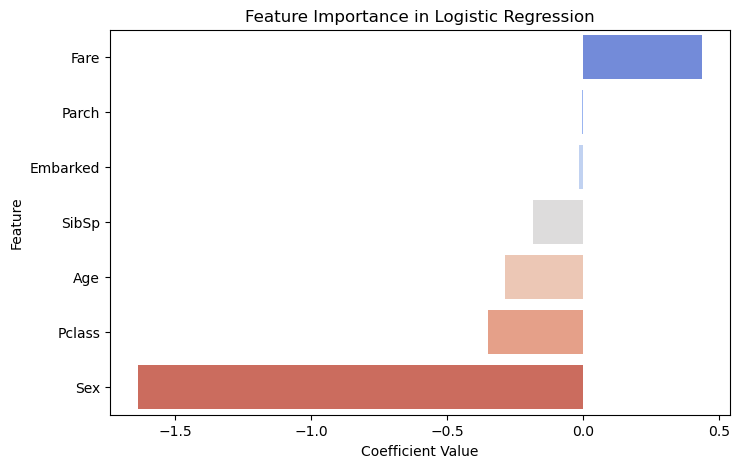

In [149]:
# Feature importance (logistic regression coefficients)
feature_importance = pd.DataFrame({'Feature': x.columns, 'Coefficient': best_model.coef_[0]})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

print("Feature Importance:\n", feature_importance)

# Visualize feature importance
plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importance['Coefficient'], y=feature_importance['Feature'], palette="coolwarm")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Feature Importance in Logistic Regression")
plt.show()


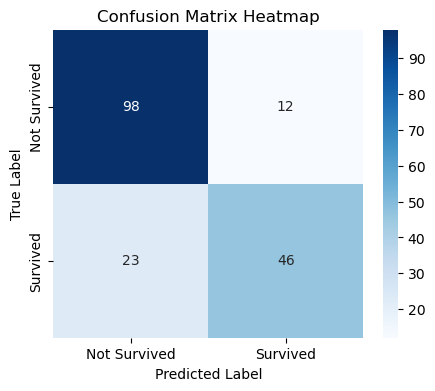

In [130]:
# Visualization - Confusion Matrix Heatmap
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()

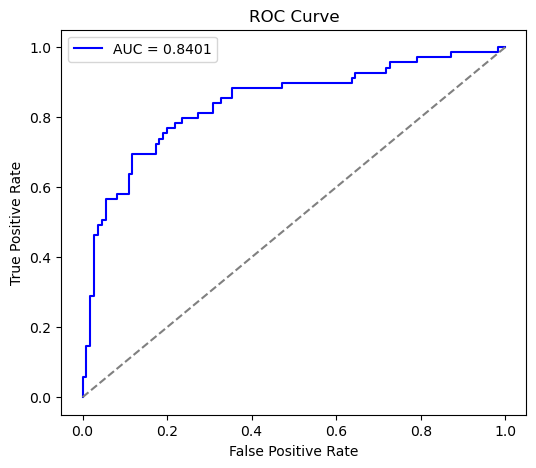

In [147]:
# Get probability scores for positive class
y_prob = best_model.predict_proba(x_test)[:, 1]

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', label=f"AUC = {roc_auc:.4f}")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guess line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


**Trade-off Discussion:**

**Precision vs Recall:**

1. Precision is crucial when false positives are costly (e.g., fraud detection).
2. Recall is crucial when false negatives are costly (e.g., disease diagnosis).
   
**For Titanic survival prediction:**

1. If the goal is to maximize saving lives, then recall (correctly identifying survivors) is more important than precision.
2. If misclassifying survivors as non-survivors isn't as risky, then precision matters more.